In [2]:
# 대학교 입학 데이터
import pandas as pd
import numpy as np

admission_data = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/admission.csv')
print(admission_data.shape)
print(admission_data.head())

(400, 5)
   admit  gre   gpa  rank gender
0      0  380  3.61     3      M
1      1  660  3.67     3      F
2      1  800  4.00     1      F
3      1  640  3.19     4      M
4      0  520  2.93     4      M


In [ ]:
# 입학이 허가될 확률의 오즈
p_hat = admission_data['admit'].mean()
print(np.round(p_hat / (1-p_hat), 3))

0.465


In [4]:
# 각 범주별 입학에 대한 오즈 계산
unique_rank = sorted(admission_data['rank'].unique())
print(unique_rank)

[np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [5]:
grouped_data = admission_data.groupby('rank').agg(p_admit = ('admit', 'mean'))
grouped_data['odds'] = grouped_data['p_admit'] / (1- grouped_data['p_admit'])
print(grouped_data)

       p_admit      odds
rank                    
1     0.540984  1.178571
2     0.357616  0.556701
3     0.231405  0.301075
4     0.179104  0.218182


In [ ]:
# 오즈를 사용한 확률 역산
print(np.round(1.178 / (1.178 + 1), 3))

0.541


<ipython-input-9-0acf728074e1>:5: RuntimeWarning: divide by zero encountered in divide
  log_odds = np.log(p / (1-p))
<ipython-input-9-0acf728074e1>:5: RuntimeWarning: divide by zero encountered in log
  log_odds = np.log(p / (1-p))


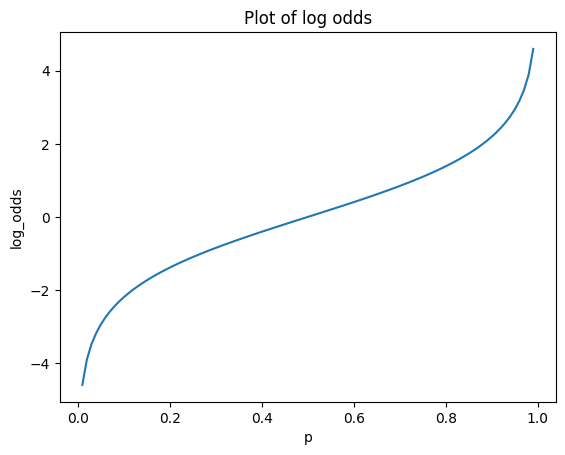

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0, 1.01, 0.01)
log_odds = np.log(p / (1-p))

plt.plot(p, log_odds)
plt.xlabel('p')
plt.ylabel('log_odds')
plt.title('Plot of log odds')
plt.show()

In [8]:
# 로지스틱 회귀계수 예측

odds_data = admission_data.groupby('rank').agg(p_admit = ('admit', 'mean')).reset_index()
odds_data['odds'] = odds_data['p_admit'] / (1-odds_data['p_admit'])
odds_data['log_odds'] = np.log(odds_data['odds'])

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols("log_odds ~ rank", data = odds_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_odds   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     68.47
Date:                Sun, 08 Jun 2025   Prob (F-statistic):             0.0143
Time:                        07:40:49   Log-Likelihood:                 3.2107
No. Observations:                   4   AIC:                            -2.421
Df Residuals:                       2   BIC:                            -3.649
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6327      0.188      3.368      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


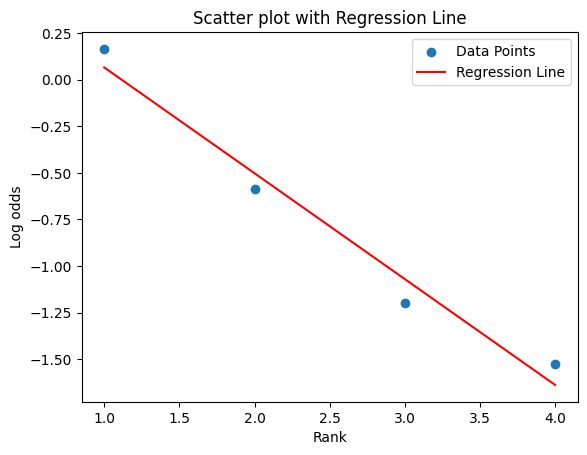

In [ ]:
import matplotlib.pyplot as plt
# 산점도 그리기
plt.scatter(odds_data['rank'], odds_data['log_odds'], label = 'Data Points')

# 회귀선 그리기
x= odds_data['rank']
y= odds_data['log_odds']
coefficients = np.polyfit(x,y,1)
poly_eq = np.poly1d(coefficients)
plt.plot(x, poly_eq(x), color='red', label = 'Regression Line')

# 그래프 레이블 설정
plt.xlabel('Rank')
plt.ylabel('Log odds')
plt.title('Scatter plot with Regression Line')
plt.legend()
plt.show()

In [9]:
selected_data = odds_data[['rank', 'p_admit', 'odds']]
selected_data['odds_frac'] = selected_data['odds'] / selected_data['odds'].shift(1, fill_value = selected_data['odds'].iloc[0])

print(selected_data)

   rank   p_admit      odds  odds_frac
0     1  0.540984  1.178571   1.000000
1     2  0.357616  0.556701   0.472352
2     3  0.231405  0.301075   0.540820
3     4  0.179104  0.218182   0.724675


In [10]:
rank_vec = np.array([1,2,3,4])
result = np.exp(0.6327-0.5675*rank_vec) / (1+np.exp(0.6327-0.5675*rank_vec))
print(result)

[0.51629423 0.37700031 0.25544112 0.16283279]


In [18]:
# Python에서 로지스틱 회귀 분석하기

admission_data = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/admission.csv')
import statsmodels.api as sm
import statsmodels.formula.api as smf

admission_data['rank'] = admission_data['rank'].astype('category')
admission_data['gender'] = admission_data['gender'].astype('category')

In [13]:
#1. Formula api 활용
model = smf.logit('admit ~ gre + gpa + rank + gender', data=admission_data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.573066
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Mon, 09 Jun 2025   Pseudo R-squ.:                 0.08305
Time:                        10:28:58   Log-Likelihood:                -229.23
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 2.283e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.9536      1.149     -3.442      0.001      -6.205      -1.702
rank[T.2]      -0.6723    

In [15]:
model = smf.glm('admit ~ gre + gpa + rank + gender', data = admission_data, family = sm.families.Binomial()).fit()

In [19]:
#2. 행렬 활용

# 범주형 변수를 더미 변수로 변환
import pandas as pd
admission_data = pd.get_dummies(admission_data, columns = ['rank','gender'], drop_first=True)

# bool 타입을 int로 변환
admission_data[['rank_2', 'rank_3', 'rank_4', 'gender_M']] = admission_data[['rank_2', 'rank_3', 'rank_4', 'gender_M']].astype(int)

# 독립변수와 종속변수 설정
X = admission_data[['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4', 'gender_M']]
y = admission_data[['admit']]

# 상수항 추가
X = sm.add_constant(X)

# Logit 모델 적합 (로지스틱 회귀)
model = sm.Logit(y, X).fit()
print(model.summary())
model = sm.GLM(y, X, family = sm.families.Binomial()).fit()

Optimization terminated successfully.
         Current function value: 0.573066
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Mon, 09 Jun 2025   Pseudo R-squ.:                 0.08305
Time:                        10:38:53   Log-Likelihood:                -229.23
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 2.283e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9536      1.149     -3.442      0.001      -6.205      -1.702
gre            0.0023      0.

In [20]:
admission_data = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/admission.csv')
import statsmodels.formula.api as smf

admission_data['rank'] = admission_data['rank'].astype('category')
admission_data['gender'] = admission_data['gender'].astype('category')
model = smf.logit('admit ~ gre + gpa + rank + gender', data=admission_data).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.573066
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Mon, 09 Jun 2025   Pseudo R-squ.:                 0.08305
Time:                        10:41:22   Log-Likelihood:                -229.23
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 2.283e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.9536      1.149     -3.442      0.001      -6.205      -1.702
rank[T.2]      -0.6723    

In [21]:
import scipy.stats as stats

result1 = 0.002256 / 0.001094
result2 = 2 * (1 - stats.norm.cdf(result1))
print(result2)

0.03919277001389343


In [22]:
# 각 Odds ratio에 대한 신뢰구간 구하기

odds_ratios = pd.DataFrame(
    {
        'OR':model.params,
        'Lower CI': model.conf_int()[0],
        'Upper CI': model.conf_int()[1]
    }
)

odds_ratios = np.exp(odds_ratios)

print(odds_ratios)

                   OR  Lower CI  Upper CI
Intercept    0.019185  0.002019  0.182267
rank[T.2]    0.510529  0.274477  0.949588
rank[T.3]    0.261282  0.132788  0.514116
rank[T.4]    0.211623  0.093307  0.479965
gender[T.M]  0.943847  0.604189  1.474453
gre          1.002259  1.000111  1.004411
gpa          2.232599  1.165054  4.278341


In [23]:
import scipy.stats as stats
# 표준오차 확인 # model.bse
# gre의 로지스틱 회귀계수에 대한 신뢰구간

a = round(model.params[5] - stats.norm.ppf(0.975) * 0.001094, 3)
b = round(model.params[5] + stats.norm.ppf(0.975) * 0.001094, 3)

glue_str = f'({a},{b})'
print(glue_str)

(0.0,0.004)


<ipython-input-23-f610e2cfb6eb>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = round(model.params[5] - stats.norm.ppf(0.975) * 0.001094, 3)
<ipython-input-23-f610e2cfb6eb>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = round(model.params[5] + stats.norm.ppf(0.975) * 0.001094, 3)


In [24]:
# gre 오즈비에 대한 신뢰구간
a = round(np.exp(a), 3)
b = round(np.exp(b), 3)

glue_str = f'({a},{b})'
print(glue_str)

(1.0,1.004)


In [25]:
# 로지스틱 회귀모델의 유의성 체크 (deviance 활용)

model = smf.logit('admit ~ gre + gpa + rank + gender', data=admission_data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.573066
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Mon, 09 Jun 2025   Pseudo R-squ.:                 0.08305
Time:                        11:54:14   Log-Likelihood:                -229.23
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 2.283e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.9536      1.149     -3.442      0.001      -6.205      -1.702
rank[T.2]      -0.6723    

In [26]:
print(model.llf)
print(model.llnull)

-229.2265043299036
-249.98825881093052


In [27]:
test_statistic = np.round(-2 *(model.llnull - model.llf), 3)
print('Test Statistic: ', test_statistic)

Test Statistic:  41.524


In [30]:
from scipy.stats import chi2
# 자유도 계산 (두 모델의 자유도 차이)
df = model.df_model - 0

# p-value 계산
p_value = chi2.sf(test_statistic, df)
print('p-value: ', np.round(p_value,10))

p-value:  2.283e-07


In [31]:
admission_data = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/admission.csv')
import statsmodels.api as sm
import statsmodels.formula.api as smf
admission_data['rank'] = admission_data['rank'].astype('category')
admission_data['gender'] = admission_data['gender'].astype('category')

model = smf.glm(formula = 'admit ~ gre+gpa+rank+gender',data = admission_data, family=sm.families.Binomial()).fit()

In [32]:
test_statistic2 = np.round(model.null_deviance - model.deviance, 3)
print

41.524


In [37]:
llf = model.llf
llnull = model.llnull

deviance = np.round(model.deviance,3)
null_deviance = np.round(model.null_deviance,3)

deviance_calculated = np.round(-2 * llf, 3)
null_deviance_calculated = np.round(-2 * llnull, 3)

result = {
    'deviance == -2*llf' : deviance == deviance_calculated,
    'null_deviance == -2*llnull' : null_deviance == null_deviance_calculated
}
print(result)

{'deviance == -2*llf': np.True_, 'null_deviance == -2*llnull': np.True_}


In [38]:
# 예측

from sklearn.metrics import roc_auc_score
new_data = pd.DataFrame({
    'gre' : [400,700,750,500],
    'gpa' : [3.5, 3.8, 3.9, 3.2],
    'rank' : [2,1,4,3],
    'gender' : ['M', 'F', 'F', 'M']
})
y_true = pd.Series([0,1,0,0])


new_data['admit_prob'] = model.predict(new_data)
auc_score = roc_auc_score(y_true, new_data['admit_prob'])

print(new_data[['gre', 'gpa', 'rank', 'gender', 'admit_prob']])
print('AUC score: ', auc_score)

   gre  gpa  rank gender  admit_prob
0  400  3.5     2      M    0.274834
1  700  3.8     1      F    0.663211
2  750  3.9     4      F    0.335772
3  500  3.2     3      M    0.160377
AUC score:  1.0
